In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil #used to move files from folder to another
import glob

In [4]:
#count number of images in the respective classes
# we only use trainig folder as our dataset we doing a split after
ROOT_DIR="/content/Training"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [5]:
number_of_images.items()

dict_items([('pituitary', 1457), ('meningioma', 1339), ('notumor', 1595), ('glioma', 1321)])

In [6]:
#splitting the data train 70% test 15% and validation 15%

# creating training folder
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)

    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(70/100*number_of_images[dir])-2),
                                replace=False):
      O=os.path.join(ROOT_DIR,dir,img) #path
      D=os.path.join("./train",dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("the folder exists")


In [7]:
#creating a splt function to create test train validation by passing folder name and percentage
def dataFolderSplit(path,splitPercntg):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)

      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(splitPercntg*number_of_images[dir])-2),
                                  replace=False):
        O=os.path.join(ROOT_DIR,dir,img) #path
        D=os.path.join("./"+path,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print("the folder exists")


In [8]:
dataFolderSplit("train",0.7)
dataFolderSplit("test",0.15)
dataFolderSplit("validation",0.15)

the folder exists


In [9]:
# test if it works the splitt
#count number of images in the respective classes

ROOT_DIR="/content/train"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images

{'pituitary': 1017, 'meningioma': 935, 'notumor': 1114, 'glioma': 922}

#MODEL BUILD


In [10]:
from keras.layers import Conv2D, MaxPool2D, Dropout , Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras

In [11]:
#CNN MODEL
#convolution layers are for exctracting the features of images we don't want a lot of layers cause that would cause overfitting
model =Sequential() # SEQUETIAL MODEL THAT TAKES PARAMS ONE BY ONE

#kernal size is the size for the convulution filter it's usually (3,3)
#we use activation function to add some non linearity
#input shape is the size of image we wanna use and it's only for the first layer
# we add pooling layers to prevent overfitting
# the number of layers depends on the size of our data set
# the number of filters in conv layers increses to xtract more features

img_size=(256,256)
channels=3
nb_classes=len(os.listdir(os.path.join(ROOT_DIR)))

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(img_size[0],img_size[1],channels)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten()) # the beginning of NN

model.add(Dense(units=64,activation='relu')) # NN layer

model.add(Dropout(rate=0.25))

model.add(Dense(units=nb_classes,activation='softmax')) #output layer we use softmax not sigmoid becuase it's multiclassification more 2 classes

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 128)       7

In [12]:
import keras
model.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])# the loss param depends on the classification here we have more than 2  classes

# preparing data using data generator

In [13]:
def preprocessingImage(path):
  #input path
  #output preproccessed img
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,
                                       target_size=img_size,
                                       batch_size=16,
                                       class_mode="categorical")
  return image


In [14]:
train_data=preprocessingImage("/content/train")

Found 3988 images belonging to 4 classes.


In [15]:
def preprocessingImage2(path): # more gnerelized
  #input path
  #output preproccessed img
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,
                                       target_size=img_size,
                                       batch_size=16,
                                       class_mode="categorical")
  return image


In [16]:
test_data=preprocessingImage2("/content/test")

Found 847 images belonging to 4 classes.


In [17]:
validation_data=preprocessingImage2("/content/validation")

Found 847 images belonging to 4 classes.


In [18]:
# early stopping and model checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es= EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')

#model checkpoint

mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]

#model training

In [19]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=8,
                       verbose=1,
                       validation_data=validation_data,
                       validation_steps=16,
                       callbacks=cd)

<ipython-input-19-1aa731f00086>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs=model.fit_generator(generator=train_data,


Epoch 1/8
8/8 [==============================] - ETA: 0s - loss: 1.6517 - accuracy: 0.2266
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to ./bestmodel.h5
8/8 [==============================] - 81s 10s/step - loss: 1.6517 - accuracy: 0.2266 - val_loss: 1.3792 - val_accuracy: 0.4375
Epoch 2/8
8/8 [==============================] - ETA: 0s - loss: 1.3509 - accuracy: 0.3672
Epoch 2: val_accuracy did not improve from 0.43750
8/8 [==============================] - 70s 9s/step - loss: 1.3509 - accuracy: 0.3672 - val_loss: 1.3032 - val_accuracy: 0.2812
Epoch 3/8
8/8 [==============================] - ETA: 0s - loss: 1.3264 - accuracy: 0.3516
Epoch 3: val_accuracy improved from 0.43750 to 0.50391, saving model to ./bestmodel.h5
8/8 [==============================] - 91s 12s/step - loss: 1.3264 - accuracy: 0.3516 - val_loss: 1.2139 - val_accuracy: 0.5039
Epoch 4/8
8/8 [==============================] - ETA: 0s - loss: 1.2160 - accuracy: 0.3438
Epoch 4: val_accuracy improved 

In [20]:
#model graohical interpretations
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'acc vs vacc')

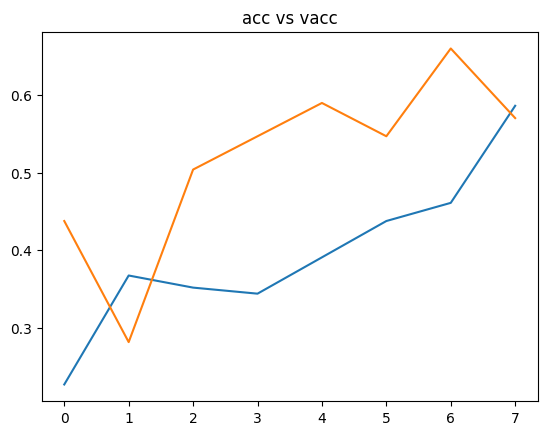

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title("acc vs vacc")

Text(0.5, 1.0, 'loss vs vloss')

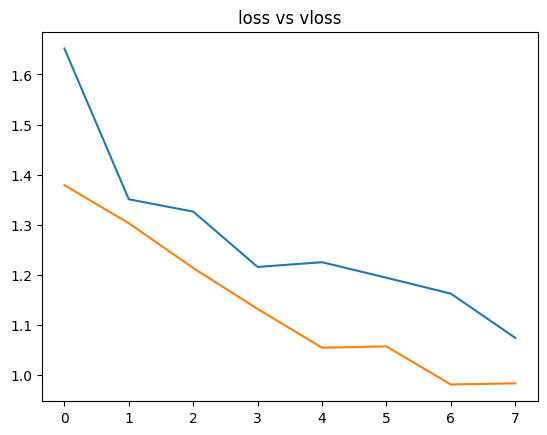

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title("loss vs vloss")

#model accuracy


In [23]:

from keras.models import load_model

#load best model
model=load_model("/content/bestmodel.h5")

acc=model.evaluate_generator(test_data)[1]

print(f'the accuracy of our model is {acc*100}%')

<ipython-input-23-93b05ea974c7>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(test_data)[1]


the accuracy of our model is 67.65053272247314%


#testing with an img

In [24]:
from tensorflow.keras.utils import load_img,img_to_array

In [25]:
train_data.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [26]:
path="/content/train/pituitary/Tr-piTr_0002.jpg"
img = load_img(path,target_size=img_size)
input_arr=img_to_array(img)/255
input_arr.shape
# to pass this image to our model it must be in a bacth size manner
input_arr=np.expand_dims(input_arr,axis=0)
pred=(model.predict(input_arr))
pred

1/1 [==============================] - 0s 367ms/step


array([[0.153559  , 0.20952778, 0.22752358, 0.40938962]], dtype=float32)

#USING A PREBUILT MODEL "MOBILENET architecture"

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet , preprocess_input

In [28]:
def preprocessingImage3(path):
  #input path
  #output preproccessed img
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function=preprocess_input,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,
                                       target_size=img_size,
                                       batch_size=16,
                                       class_mode="categorical")
  return image

def preprocessingImage4(path):
  #input path
  #output preproccessed img
  image_data=ImageDataGenerator(preprocessing_function=preprocess_input)
  image=image_data.flow_from_directory(directory=path,
                                       target_size=img_size,
                                       batch_size=16,
                                       class_mode="categorical")
  return image


In [29]:
train_data=preprocessingImage3("/content/train")
test_data=preprocessingImage4("/content/test")
validation_data=preprocessingImage4("/content/validation")

Found 3988 images belonging to 4 classes.
Found 847 images belonging to 4 classes.
Found 847 images belonging to 4 classes.


In [37]:
print(img_size+(3,))
base_model = MobileNet(input_shape=img_size+(3,),include_top=False)

(256, 256, 3)


In [38]:
for layer in base_model.layers:
  layer.trainable=False

In [39]:
x=Flatten()(base_model.output)
x=Dense(units=nb_classes ,activation="softmax")(x) # addin output layer

model=Model(base_model.input,x)

In [40]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32)     128       
 ation)                                                    

In [41]:
import keras
model.compile(optimizer='rmsprop',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [42]:
# early stopping and model checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es= EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')

#model checkpoint

mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodelmobile.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]

In [43]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=8,
                       verbose=1,
                       validation_data=validation_data,
                       validation_steps=16,
                       callbacks=cd)

<ipython-input-43-1aa731f00086>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs=model.fit_generator(generator=train_data,


Epoch 1/8
8/8 [==============================] - ETA: 0s - loss: 31.6476 - accuracy: 0.3906
Epoch 1: val_accuracy improved from -inf to 0.70312, saving model to ./bestmodelmobile.h5
8/8 [==============================] - 34s 4s/step - loss: 31.6476 - accuracy: 0.3906 - val_loss: 3.7400 - val_accuracy: 0.7031
Epoch 2/8
8/8 [==============================] - ETA: 0s - loss: 7.9536 - accuracy: 0.6250
Epoch 2: val_accuracy improved from 0.70312 to 0.80859, saving model to ./bestmodelmobile.h5
8/8 [==============================] - 31s 4s/step - loss: 7.9536 - accuracy: 0.6250 - val_loss: 2.4951 - val_accuracy: 0.8086
Epoch 3/8
8/8 [==============================] - ETA: 0s - loss: 3.5062 - accuracy: 0.7656
Epoch 3: val_accuracy did not improve from 0.80859
8/8 [==============================] - 29s 4s/step - loss: 3.5062 - accuracy: 0.7656 - val_loss: 2.2787 - val_accuracy: 0.8047
Epoch 4/8
8/8 [==============================] - ETA: 0s - loss: 4.4142 - accuracy: 0.7578
Epoch 4: val_accura

In [44]:
#load best model
model=load_model("/content/bestmodelmobile.h5")


In [45]:

acc=model.evaluate_generator(test_data)[1]

print(f'the accuracy of our model is {acc*100}%')

<ipython-input-45-4fb64833dd0f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(test_data)[1]


the accuracy of our model is 83.47107172012329%
